In [1]:
# https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices
# https://towardsdatascience.com/the-sensitivity-analysis-a-powerful-yet-underused-tool-for-data-scientists-e553fa695976

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./diamonds.csv')


In [4]:
df = pd.read_csv('./Diamonds_Prices2022.csv')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.describe()
print(df.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


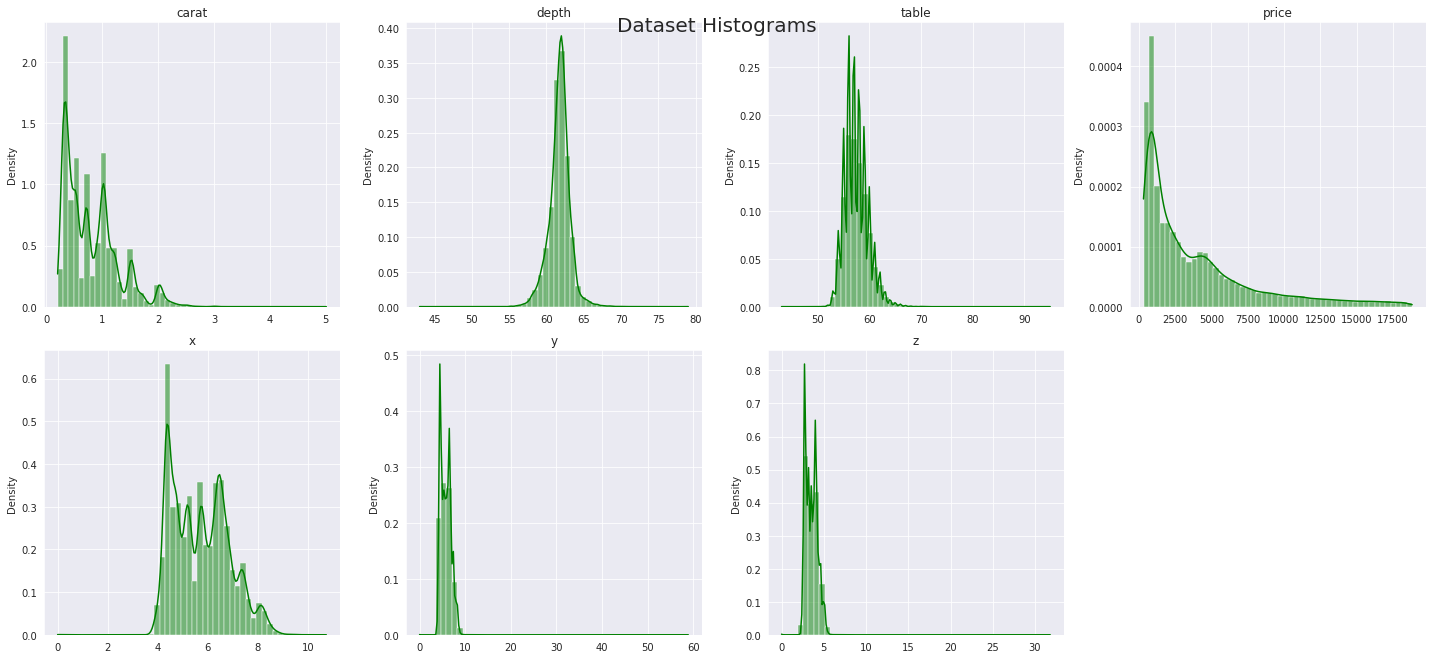

In [5]:
import seaborn as sns

#### Data Exploratory Analysis
features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
sns.set_style("darkgrid")
plt.figure(figsize=(20, 14))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Dataset Histograms", fontsize=20, y=0.95)

for n, f in enumerate(features):
    ax = plt.subplot(3,4 , n + 1)

    sns.histplot(df[f],   color='green', bins=50, ax=ax, kde=True, stat='density')

    # chart formatting
    ax.set_title(f)
    ax.set_xlabel("")
plt.tight_layout()

plt.show()

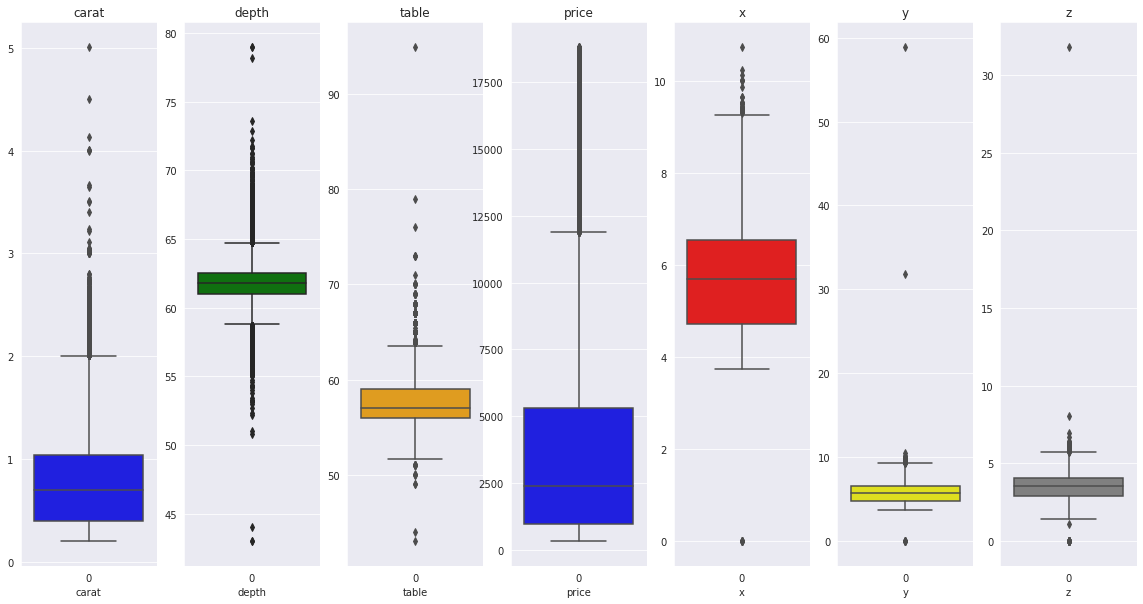

In [6]:
# Boxplot
df1 = df[features].copy()
features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
palette = ['blue', 'g', 'orange', 'b', 'r', 'yellow', 'grey']
pal = sns.color_palette("GnBu", len(features))
plt.figure(figsize=(20, 10))
max_width = 1.0

for n, f in enumerate(features):
   ax = plt.subplot(1,7 , n + 1)
   sns.boxplot(data=df1[f],ax=ax, color=palette[n]).set(title=f, xlabel=f)
plt.show()

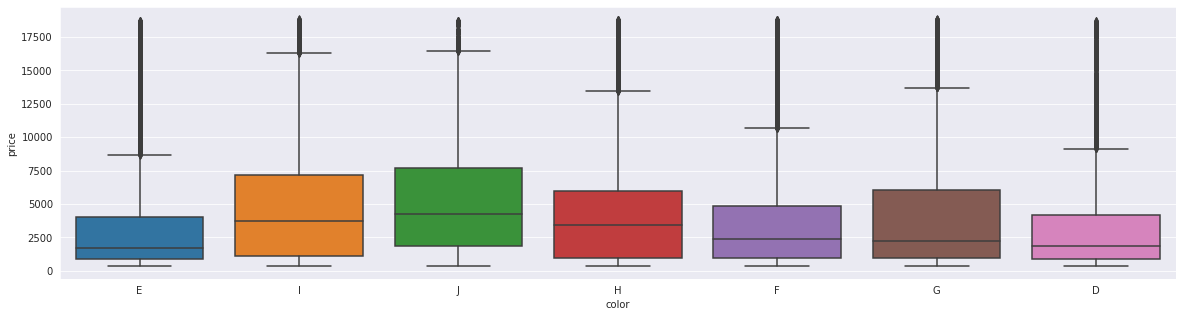

In [7]:
plt.figure(figsize=(20, 5))

sns.boxplot( x=df["color"], y=df["price"] );

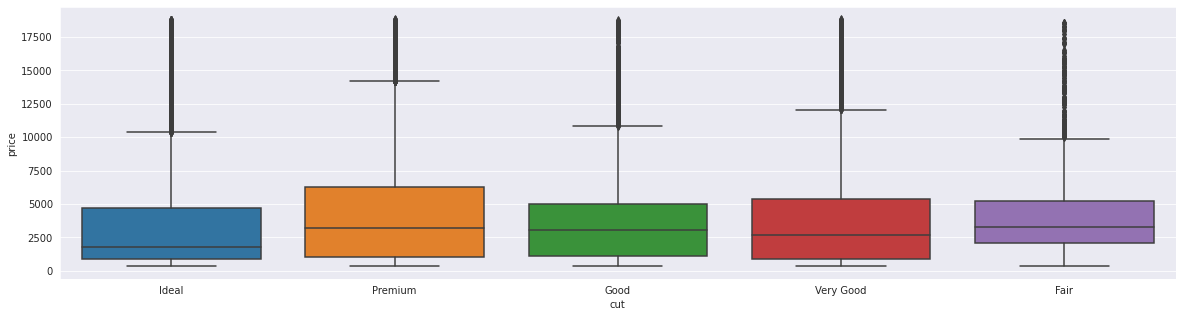

In [8]:
plt.figure(figsize=(20, 5))
sns.boxplot( x=df["cut"], y=df["price"] );

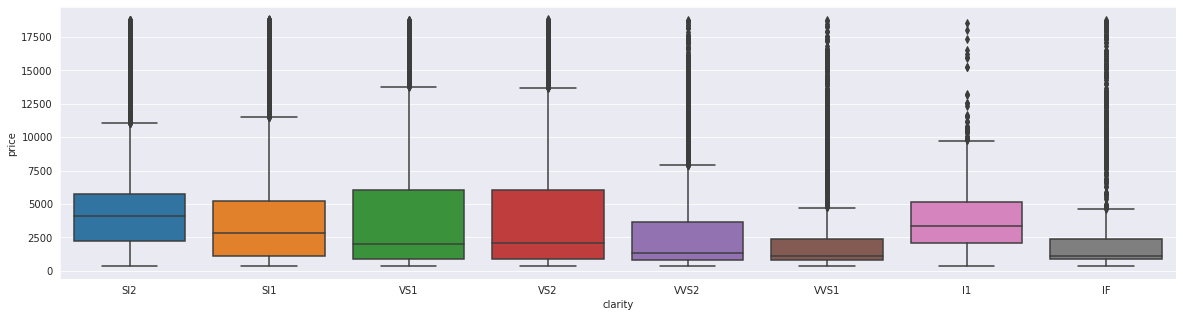

In [9]:
plt.figure(figsize=(20, 5))

sns.boxplot( x=df["clarity"], y=df["price"] );

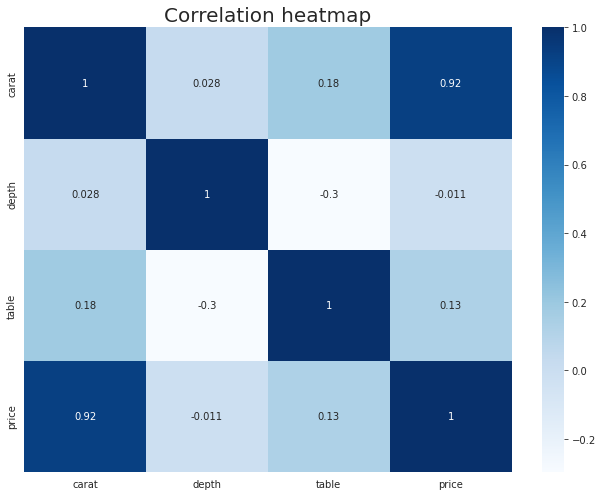

In [10]:
# create heatmap for the calculated correlation
df2 = df[['carat', 'depth', 'table', 'price']]
plt.rcParams["figure.autolayout"] = True

plt.figure(figsize=(9,7))
sns.heatmap(df1[np.array(df2.columns)].corr(),annot=True, cmap='Blues', cbar=True)
plt.title('Correlation heatmap', fontsize=20)
plt.show()

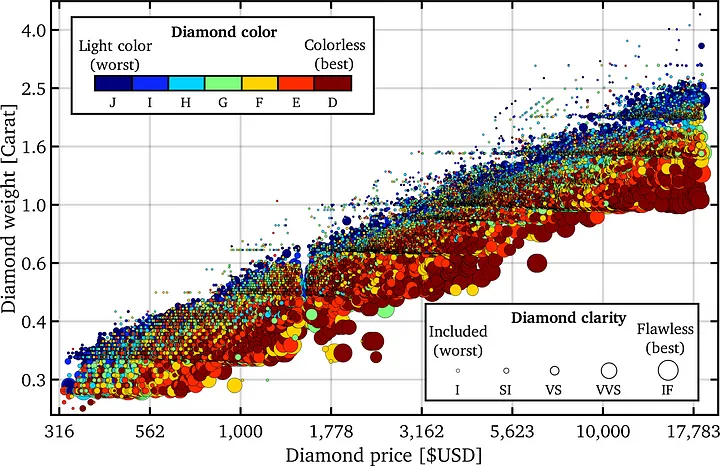

In [11]:


df['clarity'].unique()
# from top down 
# IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1
# create log scale 1,2,3,4,5,6,7,8

clear_grade = {"IF": 100, "VVS1": 80, "VVS2":50, "VS1": 20, "VS2": 10, 
              "SI1": 8, "SI2":5, "I1":1 }
df['clarity_num'] = df['clarity'].replace(clear_grade)

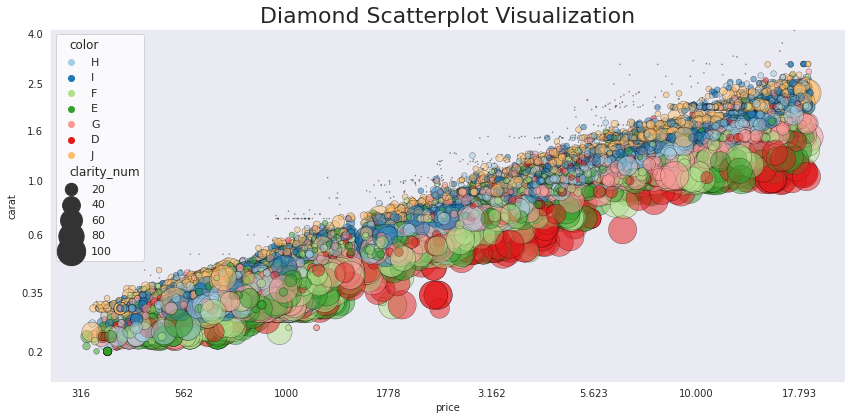

In [12]:
# log log scatter plot
df2 =  df[['carat', 'depth', 'table', 'price', 'color', 'clarity_num']].copy()
fig, ax = plt.subplots(figsize=(12,6))
sns.set(style="white")  
#Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y'
minsize = min(df['clarity_num'])
maxsize = max(df['clarity_num'])

df2 = df2.sample(frac=0.6)
# Plot diamonds x features 
sns.scatterplot(x="price", y="carat", hue="color",  
            alpha=.5, palette="Paired",  edgecolor='black', size="clarity_num",
            data=df2, ax = ax, sizes=(1,800))

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.15, 4.2)
ax.set_xticks([316, 562, 1000, 1778, 3162, 5623, 10000, 17793],['316', '562', '1000', '1778', 
                                                                '3.162', '5.623', '10.000', '17.793'], )
ax.set_yticks([0.2, 0.35, 0.6, 1.0, 1.6, 2.5, 4.0], ['0.2', '0.35', '0.6', '1.0', '1.6', '2.5', '4.0'] )
plt.title('Diamond Scatterplot Visualization', size = 22)

plt.grid()
plt.show()

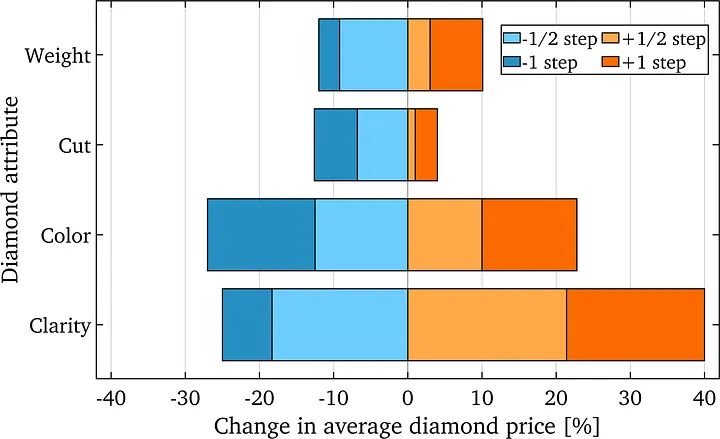df['clarity_num'].unique()

# sensitivity analysis
# How much each feature influences price?
(1) How to compare and contrast the effect of each input on the output, and 
(2) Conducting a what-if analysis

In [13]:
# simple regression OLS

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
df.shape

(53943, 11)

In [14]:
# OLS Regresion

# Data Preparation
target = df[['price']]
# ordinal data column 'clarity'
enc = LabelEncoder()
df['color_enc'] = enc.fit_transform(df['color'])
X =  df[['carat', 'depth', 'table', 'color_enc', 'clarity_num']].copy()
y = df[['price']].copy()

# Regresion
regr = LinearRegression()
regr.fit(X,y)
yhat = regr.predict(X)

# Evaluation
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y, yhat))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y, yhat))

Coefficients: 
 [[8502.51707298 -105.18237922  -76.08772414 -286.91165667   24.1422963 ]]
Mean squared error: 1838050.99
Coefficient of determination: 0.88


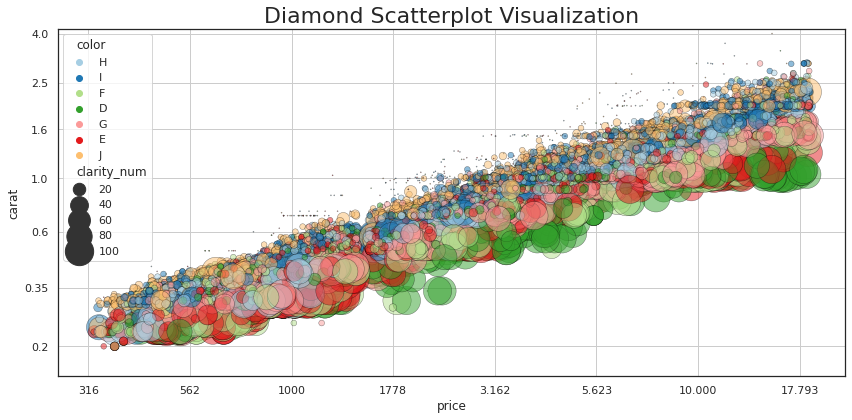

In [19]:
# log log scatter plot
df8 =  df[['carat', 'depth', 'table', 'price', 'color', 'clarity_num']].copy()
fig, ax = plt.subplots(figsize=(12,6))
sns.set(style="white")  
#Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y'
minsize = min(df8['clarity_num'])
maxsize = max(df8['clarity_num'])

df9 = df8.sample(frac=0.6)
# Plot diamonds x features 
sns.scatterplot(x="price", y="carat", hue="color",  
            alpha=.5, palette="Paired",  edgecolor='black', size="clarity_num",
            data=df9, ax = ax, sizes=(1,800))

#sns.lineplot(x= yhat.flatten(), y= df['carat'],  color="blue", linewidth=3)
#sns.lineplot(df['price'], y= yhat)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(0.15, 4.2)
ax.set_xticks([316, 562, 1000, 1778, 3162, 5623, 10000, 17793],['316', '562', '1000', '1778', 
                                                                '3.162', '5.623', '10.000', '17.793'], )
ax.set_yticks([0.2, 0.35, 0.6, 1.0, 1.6, 2.5, 4.0], ['0.2', '0.35', '0.6', '1.0', '1.6', '2.5', '4.0'] )
plt.title('Diamond Scatterplot Visualization', size = 22)

plt.grid()
plt.show()

In [16]:
a= df['carat'].values

In [17]:
b=yhat.flatten()

In [18]:
b.shape

(53943,)